# Hybrid Plant with Battery Storage Example
---
In this example, we will explore how to simulate a hybrid renewable energy system that includes both wind and solar power sources, along with battery energy storage. The battery uses the default dispatch model,simple dispatch, which uses a profit maximization objective function.

The key aspects we will cover include setting up the simulation environment, configuring the system, running the simulation, and visualizing the results.

### Import Required Modules
Begin by importing the necessary modules for the simulation.

In [1]:
from hopp.simulation.hybrid_simulation import HybridSimulation
from hopp.simulation.technologies.dispatch.plot_tools import (
    plot_battery_output, plot_battery_dispatch_error, plot_generation_profile
)

/Users/kbrunik/github/forked/HOPP/examples/workshop/log/hybrid_systems_2023-09-28T09.44.26.745938.log


### Set Site Information
Set wind and solar resource data at plant location and load pricing data. In this example, we use the Flatirons site as an example location.

In [2]:
from hopp import ROOT_DIR
from hopp.simulation.technologies.sites import SiteInfo, flatirons_site

DEFAULT_SOLAR_RESOURCE_FILE = ROOT_DIR.parent / "resource_files" / "solar" / "35.2018863_-101.945027_psmv3_60_2012.csv"
DEFAULT_WIND_RESOURCE_FILE = ROOT_DIR.parent / "resource_files" / "wind" / "35.2018863_-101.945027_windtoolkit_2012_60min_80m_100m.srw"
DEFAULT_PRICE_FILE = ROOT_DIR.parent / "resource_files" / "grid" / "pricing-data-2015-IronMtn-002_factors.csv"

site = SiteInfo(
        flatirons_site,
        solar_resource_file=DEFAULT_SOLAR_RESOURCE_FILE,
        wind_resource_file=DEFAULT_WIND_RESOURCE_FILE,
        grid_resource_file=DEFAULT_PRICE_FILE,
        solar=True,
        wind=True,
        wave=False
    )

### Define System Capacities
Define the capacities of the solar, wind, and battery components of the hybrid system in megawatts (MW).

In [3]:
solar_size_mw = 50
wind_size_mw = 50
battery_capacity_mw = 20
interconnection_size_mw = 50

### Configure Technology Parameters
Configure the characteristics of each technology in the system, including PV (solar), wind, battery, and grid interconnection.

In [4]:
technologies = {
    'pv': {
        'system_capacity_kw': solar_size_mw * 1000,
    },
    'wind': {
        'num_turbines': 10,
        'turbine_rating_kw': int(wind_size_mw * 1000 / 10)
    },
    'battery': {
        'system_capacity_kwh': battery_capacity_mw * 1000,
        'system_capacity_kw': battery_capacity_mw * 4 * 1000
    },
    'grid': {
        'interconnect_kw': interconnection_size_mw * 1000
    }
}

### Create the Hybrid Simulation Model
Instantiate the `HybridSimulation` class by providing the technology configuration and site information.

In [5]:
hybrid_plant = HybridSimulation(technologies, site)

### Configure Simulation Parameters
Set various parameters for the simulation, including degradation, wake loss, PPA price.

In [6]:
hybrid_plant.pv.dc_degradation = (0,)             # Year-over-year degradation
hybrid_plant.wind.wake_model = 3                # Constant wake loss, layout-independent
hybrid_plant.wind.value("wake_int_loss", 1)     # Percent wake loss

hybrid_plant.pv.system_capacity_kw = solar_size_mw * 1000
hybrid_plant.wind.system_capacity_by_num_turbines(wind_size_mw * 1000)

# Prices_file contains unitless dispatch factors, so add $/kWh here
hybrid_plant.ppa_price = 0.04

### Run the Simulation
Simulate the hybrid renewable energy system for a specified number of years (in this case, 20 years).

In [7]:
hybrid_plant.simulate(project_life=20)

### Print Simulation Results
Access and display various simulation results, including annual energies, net present values (NPVs), and total revenues.

In [8]:
print("Output after losses over gross output:",
      hybrid_plant.wind.value("annual_energy") / hybrid_plant.wind.value("annual_gross_energy"))

# Save the outputs
annual_energies = hybrid_plant.annual_energies
npvs = hybrid_plant.net_present_values
revs = hybrid_plant.total_revenues

print("Annual Energies:")
print(annual_energies)

print("Net Present Values:")
print(npvs)

print("Total Revenues:")
print(revs)

Output after losses over gross output: 0.8261022547138311
Annual Energies:
{"pv": 104053614.17593749, "wind": 162107774.07111272, "battery": -838364.121782637, "hybrid": 256596089.9209246}
Net Present Values:
{"pv": -6509143.037339628, "wind": -12314843.169138618, "battery": -32291532.734384965, "hybrid": -54454562.42445512}
Total Revenues:
{"pv": [0.0, 4032912.4476811443, 4073241.5721579557, 4113973.9878795356, 4155113.727758331, 4196664.865035914, 4238631.513686274, 4281017.828823136, 4323828.007111367, 4367066.287182481, 4410736.950054306, 4454844.3195548495, 4499392.762750397, 4544386.690377901, 4589830.55728168, 4635728.862854498, 4682086.151483042, 4728907.012997874, 4776196.083127852, 4823958.0439591305, 4872197.624398721], "wind": [0.0, 6375411.079084284, 6439165.189875126, 6503556.841773877, 6568592.410191617, 6634278.334293532, 6700621.117636468, 6767627.328812833, 6835303.60210096, 6903656.638121971, 6972693.204503189, 7042420.136548222, 7112844.337913704, 7183972.781292841,

### Visualize Simulation Results (Optional)
Optionally, you can visualize the simulation results using plots. Several functions are provided for plotting battery output, generation profiles, and dispatch errors.

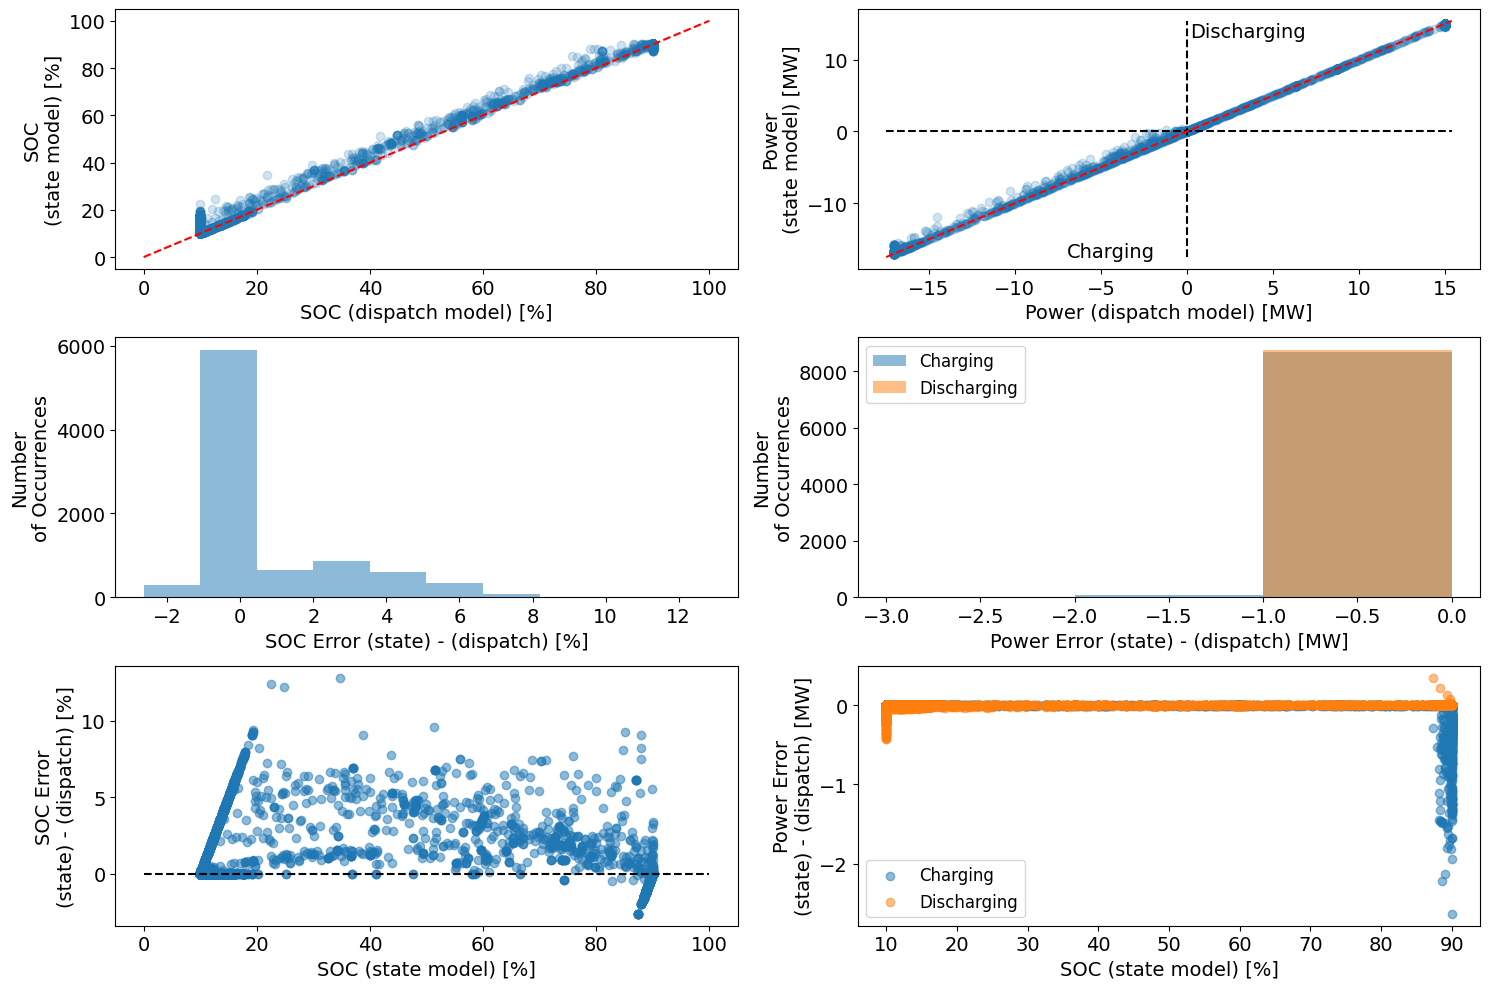

In [9]:
plot_battery_dispatch_error(hybrid_plant)

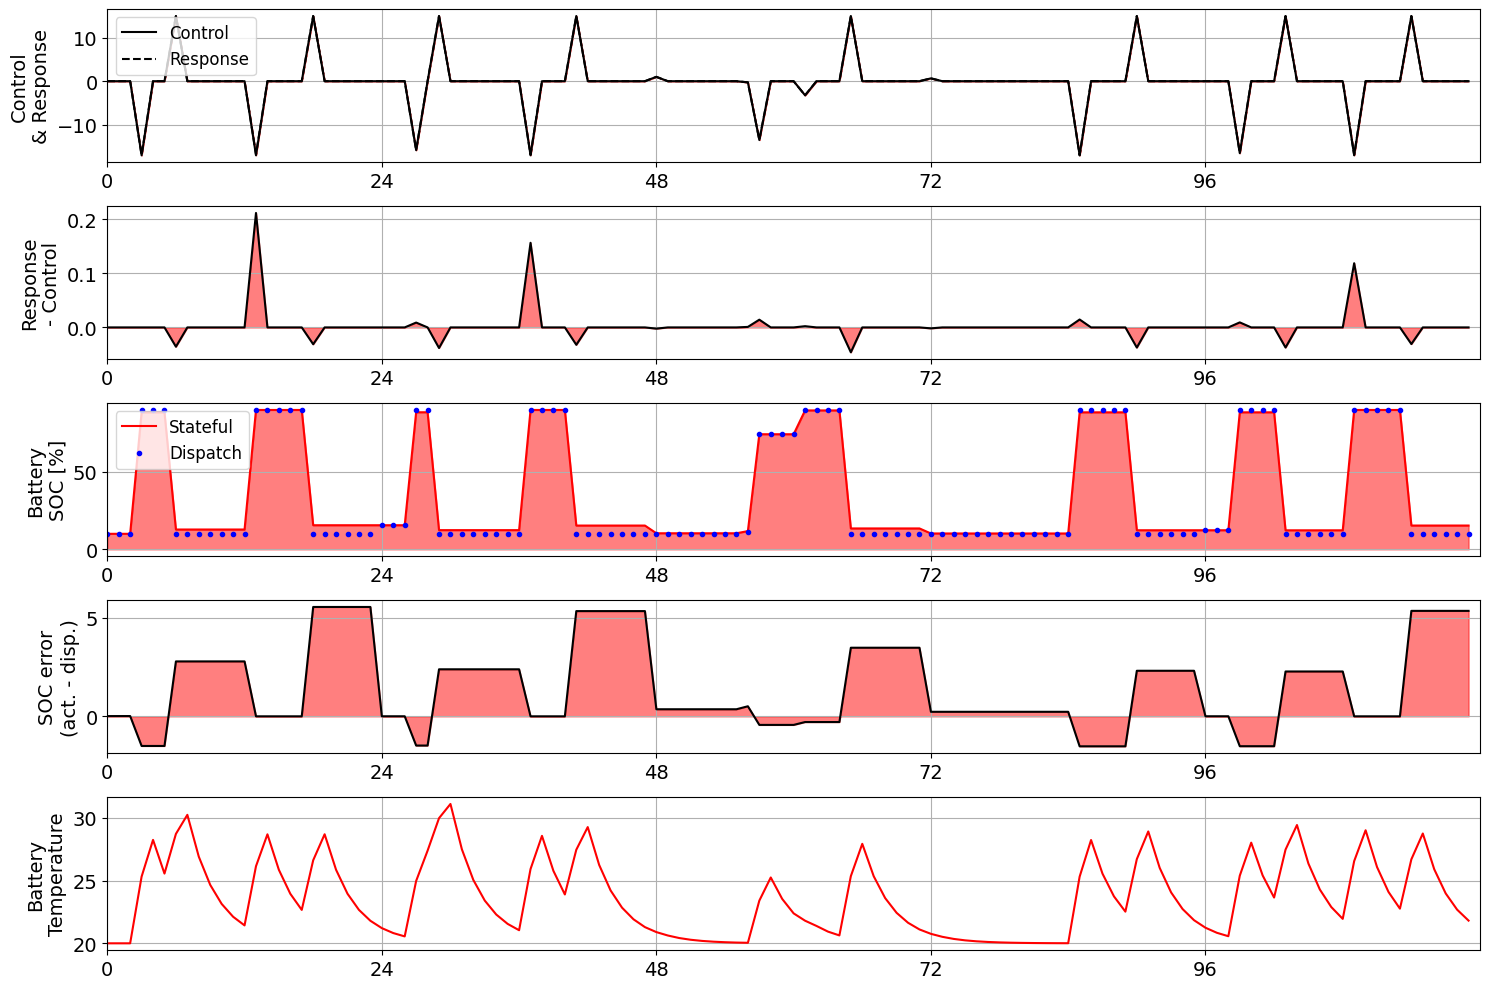

In [10]:
plot_battery_output(hybrid_plant)


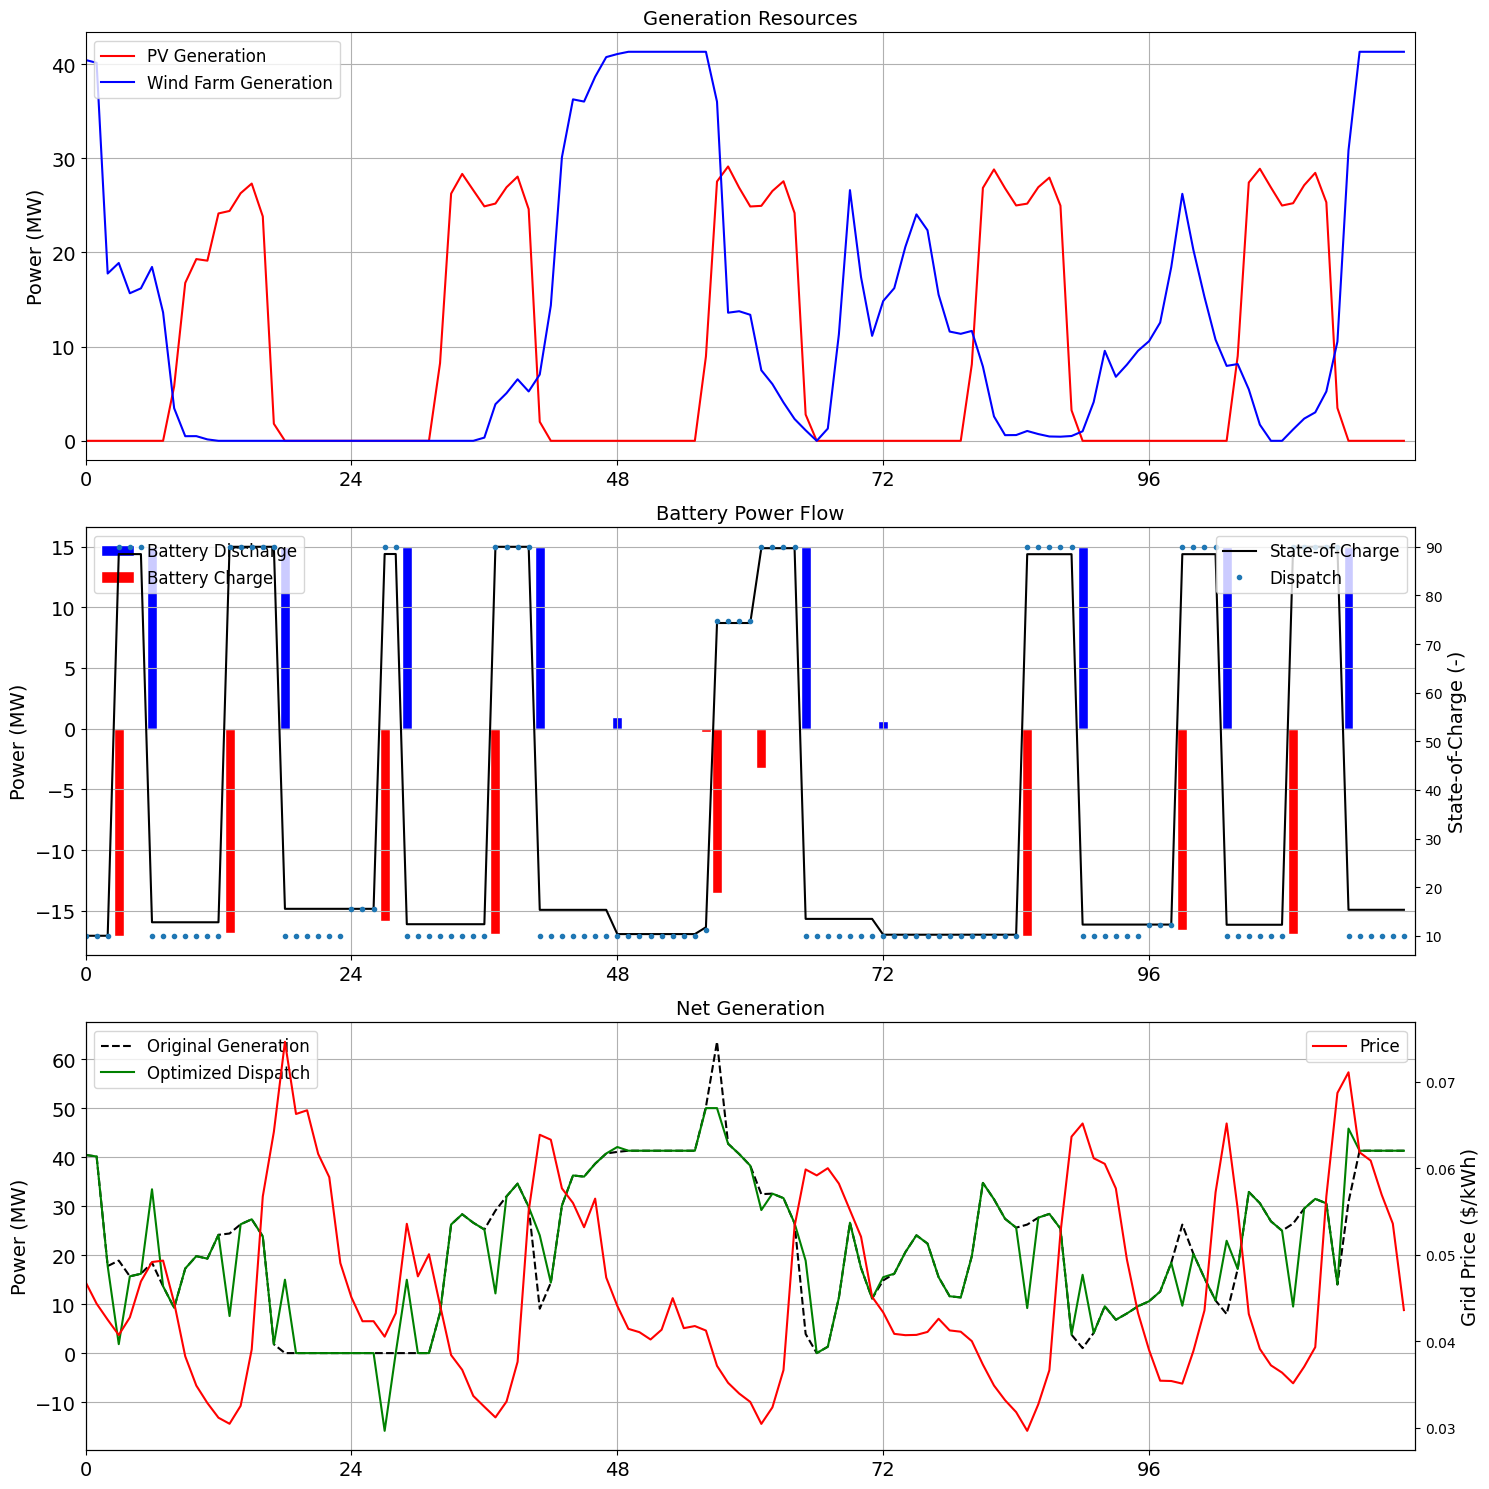

In [11]:
plot_generation_profile(hybrid_plant)